### Fitbit Validation Analysis and Graphs
####Due November 20 2015 to Courtney

What I want to do:
- Import all data from actigraphs, azumio and fitbit
- Make graphs to compare all for each user
- With all data individually:
    Average steps over a 7 day period
- With actigraph data, get MVPA

In [51]:
import pandas as pd
import numpy as np
import os.path
import glob

import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating a list of all accelerometer .csv files
accel_file = glob.glob("/Users/megan/Desktop/MIDS project/Accel CSV data/User*_ActigraphMay.csv")

# Creating a dataframe that stores user and date range information, setting user id as the index
dates = pd.read_csv('/Users/megan/Desktop/MIDS project/Dates.csv', index_col=0, parse_dates=['Initial', 'Final'])

# Creating an empty data frame to store individual data frames from the following for loop
total = pd.DataFrame()

# Defining a variable for minuties of moderate to vigorous physical activity threshold
mvpa_threshold = 1951

In [3]:
for file in accel_file:
    # Reading the accelerometer file and storing it as a dataframe
    accel = pd.read_csv(file, skipinitialspace=True, parse_dates=['Date'])
    
    # Storing the user ID from the file name
    user_id = int(os.path.basename(file).split("_")[0].replace('User',''))
    
    # Limiting dates to the days of the study
    date_range = dates.loc[user_id]
    date_bool1 = np.array(accel.Date > date_range.Initial)
    date_bool2 = np.array(accel.Date < date_range.Final)
    wear_dates = np.logical_and(date_bool1, date_bool2)
    accel = accel[wear_dates]

    # Boolean variable classifying each minute as MVPA or not
    accel['MVPA'] = accel['Axis1'] > mvpa_threshold
    
    # Grouping by study day and finding out total steps per day
    by_date = accel.groupby("Date")
    daily_totals = by_date.sum().reset_index()
    daily_totals['User'] = user_id
    daily_totals['Type'] = 'Actigraph'
    
    # Appending the user dataframe to the total dataframe
    total = total.append(daily_totals, ignore_index=True)

accel_total = total[['User', 'Type', 'Date', 'Steps', 'MVPA']]

In [4]:
# Reading in fitbit data and editing columns to match the Actigraph data
fitbit = pd.read_csv('/Users/megan/Desktop/MIDS project/Fitbit .txt files/meas_fitbit_intraday_1wk_4.txt', sep='|', parse_dates=['date'])
fitbit.rename(columns={'user_id':'User', 'date':'Date', 'steps':'Steps'}, inplace=True)
fitbit = fitbit.drop('minute', axis=1)

# Dropping dates outside of the date range for each user
fitbit = fitbit.join(dates, on='User')
date_bool1 = np.array(fitbit.Date > fitbit.Initial)
date_bool2 = np.array(fitbit.Date < fitbit.Final)
wear_dates = np.logical_and(date_bool1, date_bool2)
fitbit = fitbit[wear_dates]

# Grouping by study day, calculating total steps per day, and saving to a new dataframe
by_date = fitbit.groupby(["User", "Date"])
daily_totals = by_date.sum().reset_index()
daily_totals['Type'] = 'Fitbit'
fitbit_total = daily_totals[['User', 'Type', 'Date', 'Steps']]

In [41]:
# Concatonating accelerometer and fitbit dataframes into a master dataframe
master = pd.concat([accel_total, fitbit_total])
master.sort(['User','Date'], inplace=True)
master = master[['User', 'Type', 'Date', 'Steps']]

/Users/megan/anaconda/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


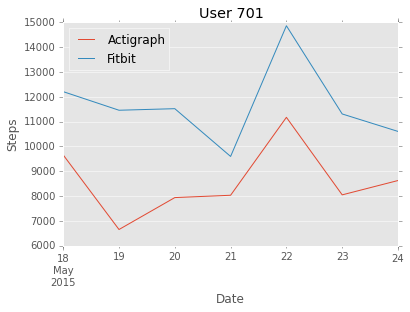

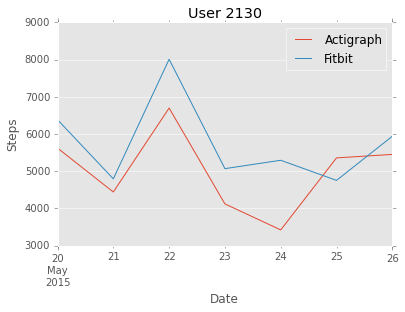

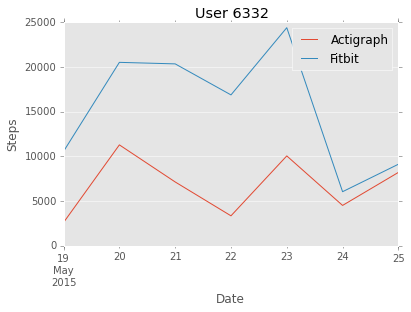

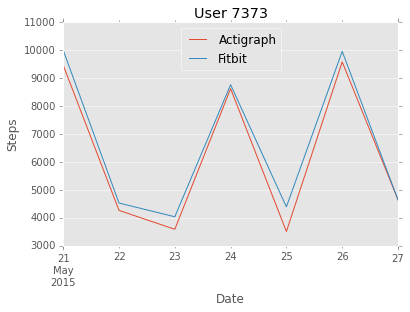

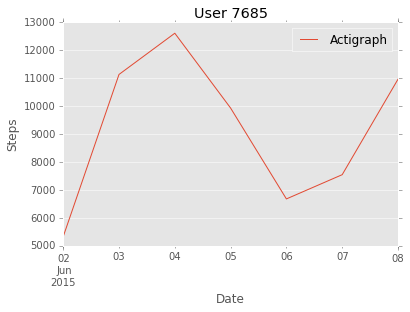

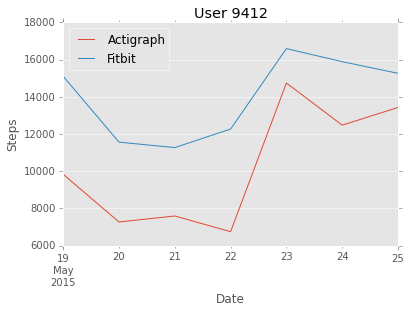

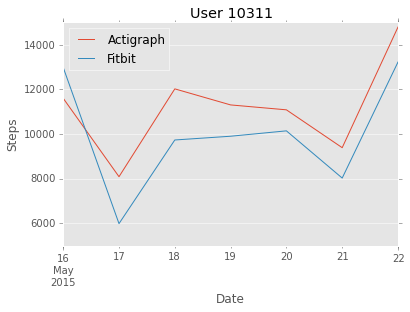

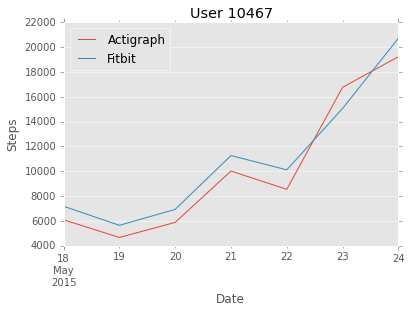

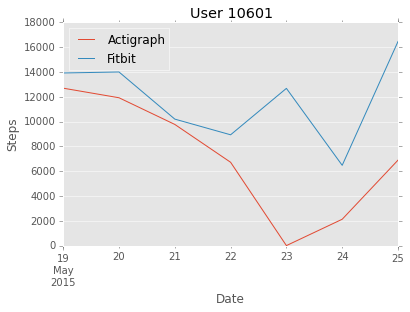

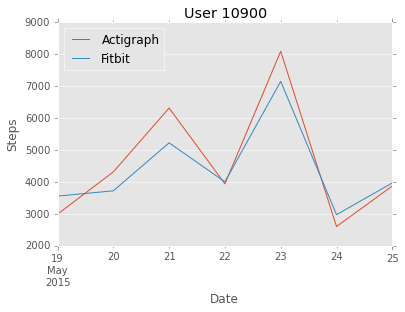

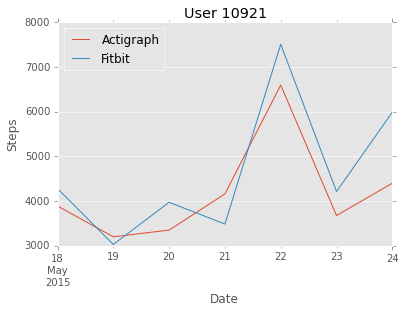

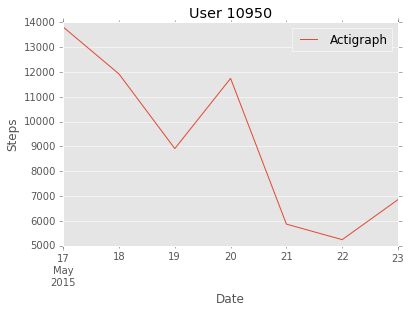

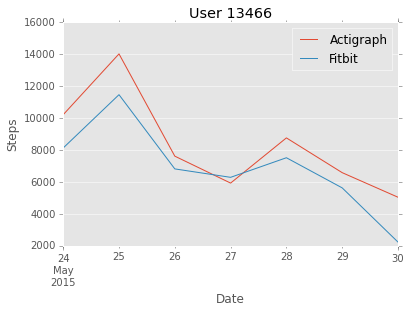

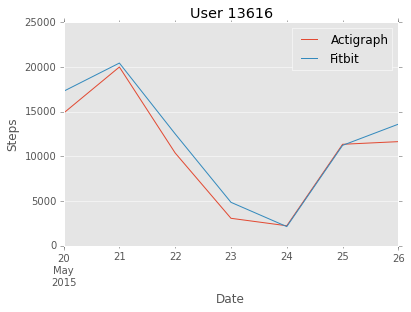

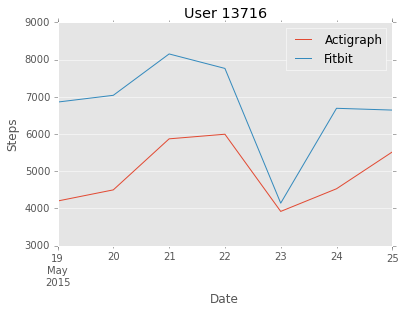

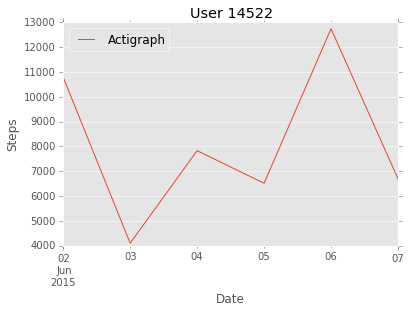

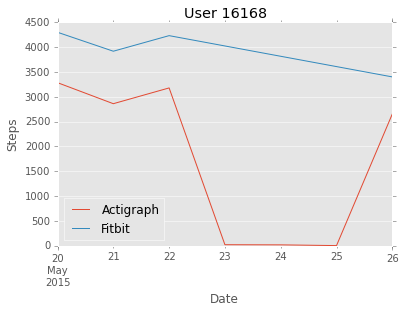

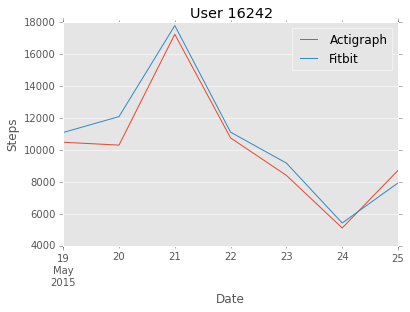

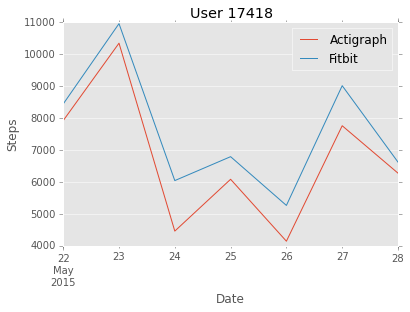

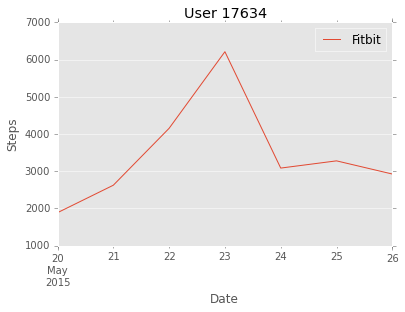

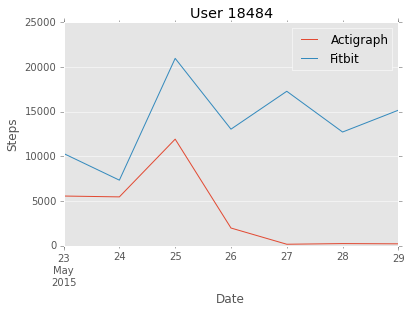

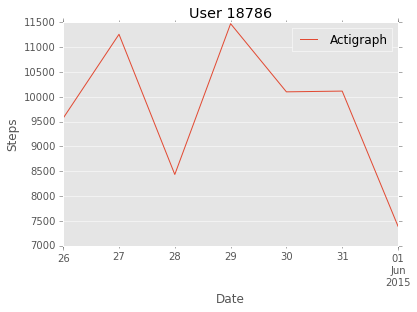

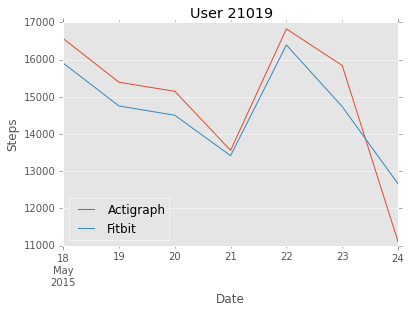

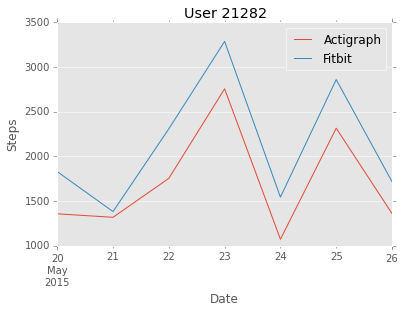

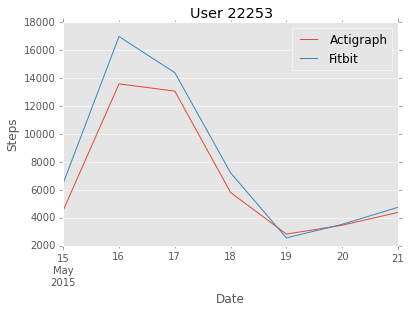

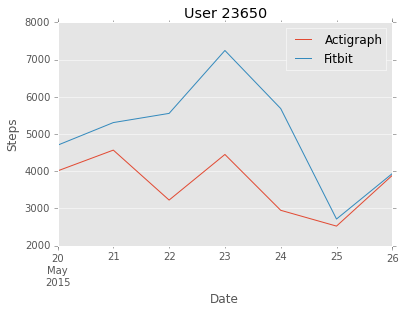

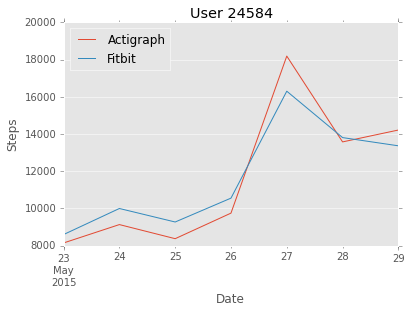

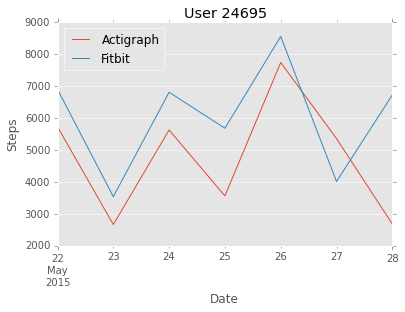

In [53]:
fig = plt.figure()

for user, user_data in master.groupby(['User']):
    fig = plt.figure()
    fig, ax = plt.subplots()
    labels = []
    for key, grp in user_data.groupby(['Type']):
        ax = grp.plot(ax=ax, kind='line', x='Date', y='Steps', c=key)
        labels.append(key)
    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    plt.title('User ' + str(user))
    plt.xlabel('Date')
    plt.ylabel('Steps')
    fig.savefig('Images/User_'+str(user)+'.jpg')

  

['fivethirtyeight', 'ggplot', 'grayscale', 'bmh', 'dark_background']
